In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit_algorithms import AmplitudeEstimation, EstimationProblem
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

'''
説明:
以下は、Qiskit Algorithms を使った 量子振幅推定（Quantum Amplitude Estimation, QAE） の標準的なコードです。
1ビットでシンプルな例です。
このコードは、
∣𝜓⟩=cos⁡(𝜃)∣0⟩+sin⁡(𝜃)∣1⟩
という量子状態において、
「|1⟩ が観測される確率 𝑎=sin^⁡2(𝜃)」を量子的に高速＆高精度に推定するというものです。
'''

################
#### 理論値の定義：sin²(π/6) = 0.25
################
theta = np.pi / 6 # θ = 30度
a_theoretical = np.sin(theta) ** 2 # → 0.25
'''
# 目標とする振幅（成功確率）は sin⁡^2(𝜋/6)=0.25
#この値と QAE の推定値を比較して精度を評価します
'''

################
#### 状態準備：Aゲートの定義
################
state_prep = QuantumCircuit(1)
state_prep.ry(2 * theta, 0)

'''
# RY(2θ) を 1 量子ビットに適用すると、次の状態が得られます：
# ∣𝜓⟩=cos⁡(𝜃)∣0⟩+sin⁡(𝜃)∣1⟩
# この状態において、|1⟩ を測定する確率が 
# 𝑎=sin^⁡2(𝜃)
'''

################
#### 推定する「問題」を定義
################
problem = EstimationProblem(
    state_preparation=state_prep,
    objective_qubits=[0],
)
'''
# これは「振幅推定の対象問題」です
# state_preparation: 上で作った量子状態 |ψ⟩ を生成する回路
# objective_qubits=[0]: qubit 0 が |1⟩ のときが「成功」 とみなされる
'''

################
#### 振幅推定器の構築と実行
################
ae = AmplitudeEstimation(num_eval_qubits=3, sampler=Sampler())
result = ae.estimate(problem)

'''
・AmplitudeEstimation：QAEアルゴリズムを使うクラス
・num_eval_qubits=3：
  ・精度を決めるパラメータ（結果の分解能は 2^3=8 段階）
・Sampler()：量子回路を実行するシミュレータ（Qiskit Aer）
  ・.estimate(problem)：推定を実行
'''

################
#### 結果表示
################
print(f"推定された振幅: {result.estimation:.6f}")
print(f"理論値（sin²(π/6)）: {a_theoretical:.6f}")

'''
result.estimation: QAE によって得られた推定値（例：0.265625 など）
理論値と比較することで、どれだけ正確に推定できたかがわかります
'''

推定された振幅: 0.146447
理論値（sin²(π/6)）: 0.250000


/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

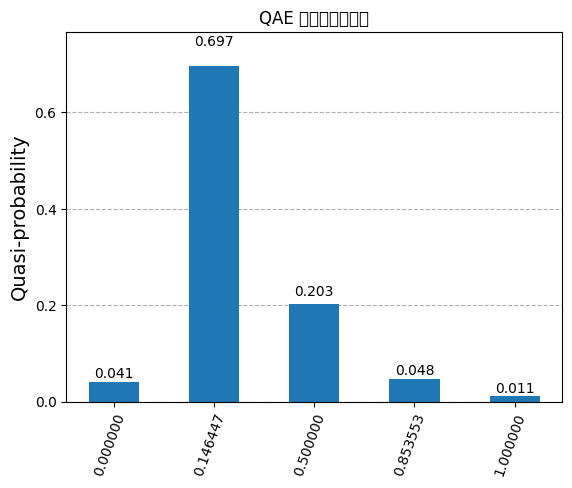

In [ ]:
# print("samples の型:", type(result.samples))
# print("samples の中身:", result.samples)

# 振幅の候補とその確率（そのまま辞書）
hist_data = {
    f"{float(k):.6f}": float(v)
    for k, v in result.samples.items()
}

# ヒストグラム描画
plot_histogram(hist_data, title="QAE 推定振幅の分布")